<a href="https://colab.research.google.com/github/Ketan2612/Model-Accuracy/blob/main/Model_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data (1).csv'
data = pd.read_csv(file_path)

# Handle missing values in 'bmi' by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Drop the 'id' column as it is not needed for prediction
data = data.drop(columns=['id'])

# Separate features and target
X = data.drop(columns=['stroke'])
y = data['stroke']

# One-hot encode categorical variables and scale numerical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and transform the training data, and transform the testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_predictions = rf_model.predict(X_test_processed)

# Train Logistic Regression (since stroke prediction is a binary classification, use LogisticRegression)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_processed, y_train)
lr_predictions = lr_model.predict(X_test_processed)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

rf_class_report = classification_report(y_test, rf_predictions)
lr_class_report = classification_report(y_test, lr_predictions)

# Output results
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("\nRandom Forest Confusion Matrix:\n", rf_conf_matrix)
print("\nLogistic Regression Confusion Matrix:\n", lr_conf_matrix)
print("\nRandom Forest Classification Report:\n", rf_class_report)
print("\nLogistic Regression Classification Report:\n", lr_class_report)


Random Forest Accuracy: 0.9419439008480104
Logistic Regression Accuracy: 0.9425962165688193

Random Forest Confusion Matrix:
 [[1444    0]
 [  89    0]]

Logistic Regression Confusion Matrix:
 [[1444    0]
 [  88    1]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-11-941c4a490a9d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


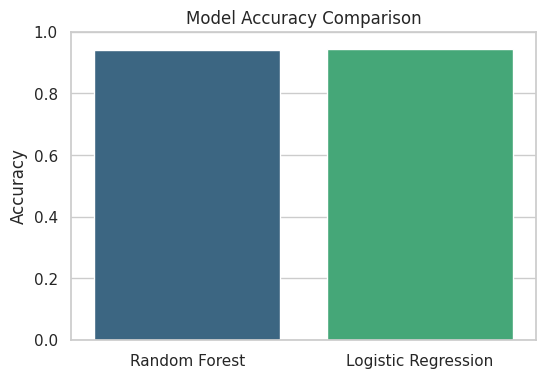

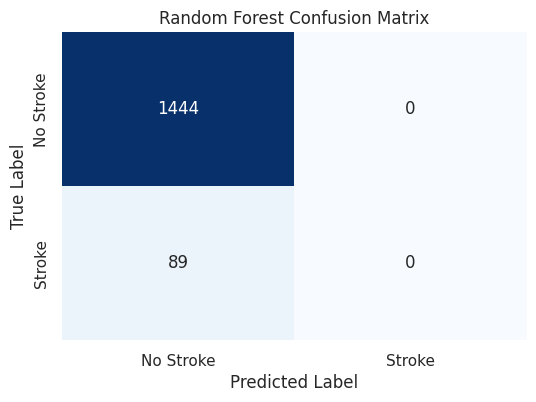

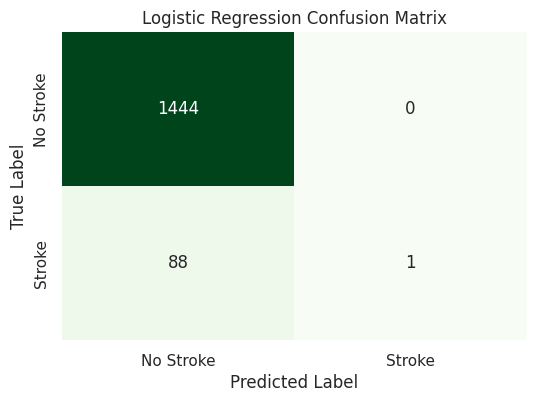

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


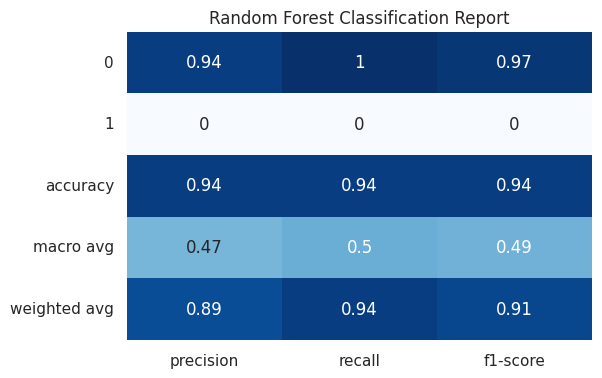

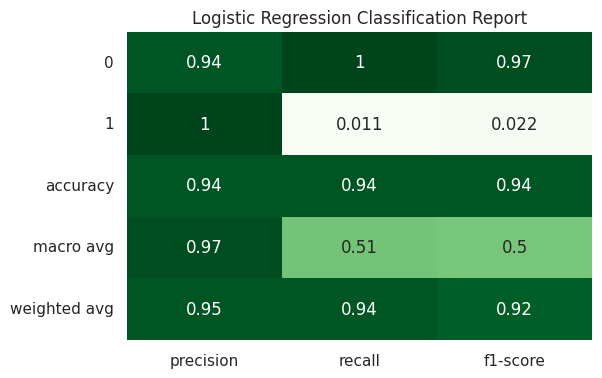

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot the accuracies of both models
plt.figure(figsize=(6, 4))
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot the classification report as a heatmap for Random Forest
rf_class_report_dict = classification_report(y_test, rf_predictions, output_dict=True)
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(rf_class_report_dict).iloc[:-1, :].T, annot=True, cmap='Blues', cbar=False)
plt.title('Random Forest Classification Report')
plt.show()

# Plot the classification report as a heatmap for Logistic Regression
lr_class_report_dict = classification_report(y_test, lr_predictions, output_dict=True)
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(lr_class_report_dict).iloc[:-1, :].T, annot=True, cmap='Greens', cbar=False)
plt.title('Logistic Regression Classification Report')
plt.show()


In [ ]:
import pandas as pd
path="/content/healthcare-dataset-stroke-data (1).csv"
data=pd.read_csv(path)
print(data)
print(data.info())
print(data.isnull().sum())

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
median_value=data.bmi.median()
print(median_value)

data.bmi=data.bmi.fillna(median_value)
print(data)
print(data.isnull().sum())

data['gender']=data['gender'].map({'Female':0,'Male':1})
data['ever_married']=data['ever_married'].map({'No':0,'Yes':1})
data['Residence_type']=data['Residence_type'].map({'Rural':0,'Urban':1})
print(data)

median_value=data.gender.median()
print(median_value)
data.gender=data.gender.fillna(median_value)
print(data)

28.1
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  f

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_work_type=LabelEncoder()
le_smoking_status=LabelEncoder()

data['work_type']=le_work_type.fit_transform(data['work_type'])
data['smoking_status']=le_smoking_status.fit_transform(data['smoking_status'])

inputs=data.drop(['id','stroke'],axis=1)
print("Inputs:",inputs)
outputs=data['stroke']
print("Outputs:",outputs)
print(data.isnull().sum())

Inputs:       gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1.0  67.0             0              1             1          2   
1        0.0  61.0             0              0             1          3   
2        1.0  80.0             0              1             1          2   
3        0.0  49.0             0              0             1          2   
4        0.0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105     0.0  80.0             1              0             1          2   
5106     0.0  81.0             0              0             1          3   
5107     0.0  35.0             0              0             1          3   
5108     1.0  51.0             0              0             1          2   
5109     0.0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0              

In [ ]:
import math
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with all the columns
data = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')

# Fill missing values in 'bmi' column
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Label encoding for categorical features
le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_work_type = LabelEncoder()
le_Residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()

data['gender'] = le_gender.fit_transform(data['gender'])
data['ever_married'] = le_ever_married.fit_transform(data['ever_married'])
data['work_type'] = le_work_type.fit_transform(data['work_type'])
data['Residence_type'] = le_Residence_type.fit_transform(data['Residence_type'])
data['smoking_status'] = le_smoking_status.fit_transform(data['smoking_status'])

# Prepare inputs and outputs
inputs = data.drop(columns=['id', 'stroke'])  # Assuming 'stroke' is the target column
outputs = data['stroke']

# Train the Decision Tree model
model = tree.DecisionTreeClassifier()
model.fit(inputs, outputs)

# User input section
gender = le_gender.transform([str(input("Enter the gender of the person (e.g., Male, Female, Other): "))])[0]
age = float(input("Enter the age of the person: "))
hypertension = int(input("Enter if the person has hypertension (1 for Yes, 0 for No): "))
heart_disease = int(input("Enter if the person has a heart disease (1 for Yes, 0 for No): "))
ever_married = le_ever_married.transform([str(input("Enter if the person has ever married (e.g., Yes, No): "))])[0]
work_type = le_work_type.transform([str(input("Enter the work type of the person (e.g., Private, Self-employed): "))])[0]
Residence_type = le_Residence_type.transform([str(input("Enter the residence of the person (e.g., Urban, Rural): "))])[0]
avg_glucose_level = float(input("Enter the average glucose level of the person: "))
bmi = str(input("Enter the BMI value of the person: "))
smoking_status = le_smoking_status.transform([str(input("Enter the smoking status of the person (e.g., formerly smoked, never smoked): "))])[0]

# Make prediction
res = model.predict([[gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status]])
print("Prediction (0: No Stroke, 1: Stroke):", math.ceil(res[0]))

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=42)

# Train the Decision Tree model with limitations to prevent overfitting
model = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy * 100)

# Cross-validate to get a better sense of generalization
cv_scores = cross_val_score(model, inputs, outputs, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean() * 100)




Enter the gender of the person (e.g., Male, Female, Other): Male
Enter the age of the person: 80
Enter if the person has hypertension (1 for Yes, 0 for No): 0
Enter if the person has a heart disease (1 for Yes, 0 for No): 1
Enter if the person has ever married (e.g., Yes, No): Yes
Enter the work type of the person (e.g., Private, Self-employed): Private
Enter the residence of the person (e.g., Urban, Rural): Rural
Enter the average glucose level of the person: 105.92
Enter the BMI value of the person: 32.5
Enter the smoking status of the person (e.g., formerly smoked, never smoked): never smoked
Prediction (0: No Stroke, 1: Stroke): 1
Test Accuracy: 93.73776908023484
Cross-Validation Accuracy: 94.69667318982388


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
